# Research homework

**Topic: Sigmoid and Softmax activation functions.**

### First of all, what are activation functions and what are they for?

Activation functions are divided into linear and nonlinear.

* Linear activation functions :

Linear activation functions do not compress the output into any range. Example: house price prediction.

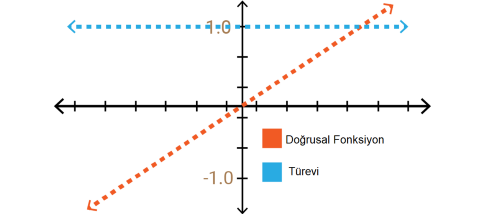

* Nonlinear activation functions :

We call correct functions to functions that have more than one degree.
It squeezes the values ​​into any range, preventing the output at the layer from being too large.

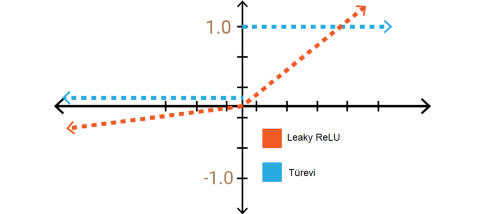

# Sigmoid Activation Function

* Sigmoid activation function squeezes the values between [0,1].

* This function is usually applied to the output layer in binary classification problems, if the output value is close to 0, it belongs to class A, but if its output value is close to 1, it belongs to class B. Besides these, it can also be applied to output on hidden layers.

* Sigmoid function has derivative. The Sigmoid function is not monotonous, its derivative changes sign.

* The sigmoid activation function can cause the model to get stuck during training, so it is not usually used for complex machine learning problems.

* The gradient may died.

* Not 0 oriented.

* It does exp () computation and therefore runs slowly.

* $A = \sigma(w^T X + b) = (a^{(1)}, a^{(2)}, ..., a^{(m-1)}, a^{(m)})$

### Graph of Sigmoid activation function

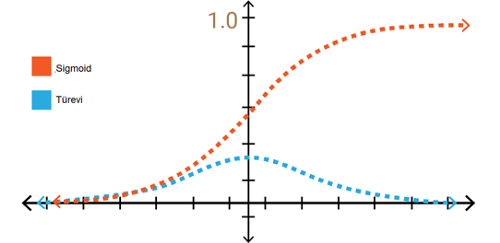

$$\hat{y}^{(i)} = a^{(i)} = sigmoid(z^{(i)})\$$ 

$$sigmoid( w^T x + b) = \frac{1}{1 + e^{-(w^T x + b)}}$$

In [6]:
# Let's perform a simple tutorial using the Sigmoid activation function.

from numpy import exp, array, random, dot

from time import sleep as sl

class YapaySinirAglariCKA():
    
    def __init__(self):

        random.seed(1)
        self.agirliklar = 2 * random.random((2, 1)) - 1

    def __sigmoid(self, x):
        return 1 / (1 + exp(-x))

    def __sigmoid_turev(self, x):
        return x * (1 - x)

    def egit_beni(self, egitim_girisler, egitim_cikislar, toplam_iterasyon):
        
        for iterasyon in range(toplam_iterasyon):
            cikis = self.besle(egitim_girisler)

            hata = egitim_cikislar - cikis

            ayar = dot(egitim_girisler.T, hata * self.__sigmoid_turev(cikis))

            self.agirliklar += ayar

    def besle(self, giris):
        return self.__sigmoid(dot(giris, self.agirliklar))


ysa = YapaySinirAglariCKA()
print("Başlangıç ağırlıkları (rastgele): ")
print(ysa.agirliklar)
sl(2)


egitim_girisler = array([[0, 0], [0, 1], [1, 0],[1,1]])
egitim_cikislar = array([[0, 1, 1, 1]]).T


ysa.egit_beni(egitim_girisler, egitim_cikislar, 100000)

print("Eğitim sonrası ağırlıklar: ")
print(ysa.agirliklar)


print("Yeni test girişleri için çıkış kaç : ")
print(ysa.besle(array([0, 1])))

# The output value should approach 1.

Başlangıç ağırlıkları (rastgele): 
[[-0.16595599]
 [ 0.44064899]]
Eğitim sonrası ağırlıklar: 
[[6.09632032]
 [6.09636022]]
Yeni test girişleri için çıkış kaç : 
[0.99775401]


# Softmax Activation Function

* It has a similar structure to the sigmoid activation function.

* In multi-class problems, the output layer should be equal to the number of classes and the activation functions of the output layers should be softmax.

* The range of values is between [0,1].

* When the output value of all layers using the softmax activation function is added together, the result should be one.

* The model's estimate is the layer closest to 1.

* Softmax activation function is a good estimator, not only AI is used. For example, Solving the multi-arm bandit problem is also used. In the example below you can see the forecasts visualized.

[0.77258027 0.137206   0.42429237 0.27195611 0.30100794 0.67242077
 0.51778672 0.19008705 0.46913444 0.33954087]


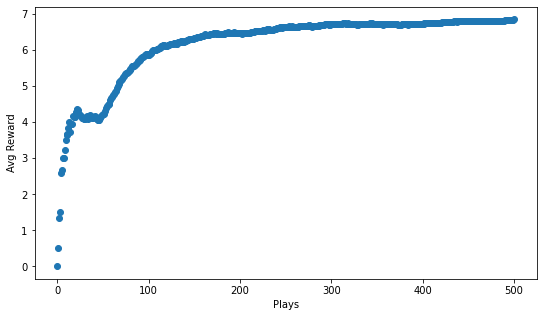

In [14]:
#Solving the multi-arm bandit

import numpy as np
from scipy import stats
import random
import matplotlib.pyplot as plt

n = 10                         
probs = np.random.rand(n) 
eps = 0.2   

print(probs)

def get_reward(prob, n=10):    
    reward = 0    

    for i in range(n):

        if random.random() < prob:            
            reward += 1

    return reward

record = np.zeros((n,2))

def update_record(record,action,r):   

    new_r = (record[action,0] * record[action,1] + r) / (record[action,0] + 1)    
    record[action,0] += 1    
    record[action,1] = new_r    
    return record

def softmax(av, tau=1.12):    
    softm = np.exp(av / tau) / np.sum( np.exp(av / tau) )     
    return softm


fig,ax = plt.subplots(1,1)
ax.set_xlabel("Plays")
ax.set_ylabel("Avg Reward")
fig.set_size_inches(9,5)
rewards = [0]
for i in range(500):    
    p = softmax(record[:,1])            
    choice = np.random.choice(np.arange(n),p=p)         
    r = get_reward(probs[choice])    
    record = update_record(record,choice,r)    
    mean_reward = ((i+1) * rewards[-1] + r)/(i+2)    
    rewards.append(mean_reward)
ax.scatter(np.arange(len(rewards)),rewards)

### Graph of Sigmoid activation function

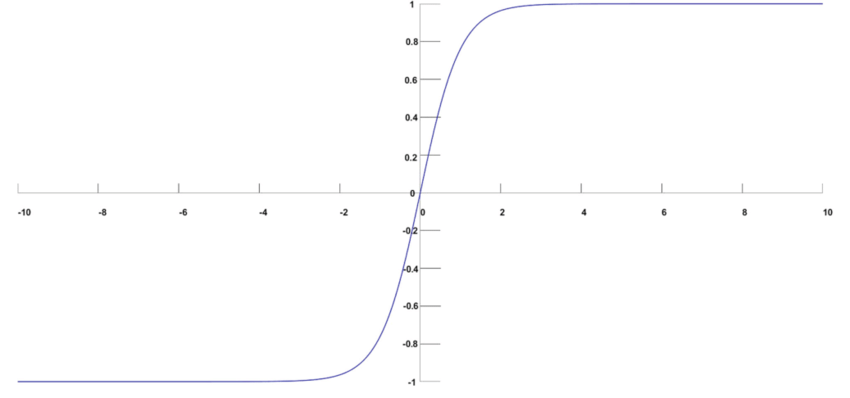

$$\hat{y}^{(i)} = a^{(i)} = softmax(z^{(i)})\$$

$$a_i = \frac{e^{z_i}}{\sum_{k=1}^c e^{z_k}} \\ 
\text{where} \sum_{i=1}^c a_i = 1$$